In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

In [6]:
var = 0.2
data_size = 1000000
def generate_x(data_size): 
    return np.sign(np.random.normal(0.,1.,[data_size,1]))
def generate_y(x, var, data_size): 
    return x + np.random.normal(0.,np.sqrt(var),[data_size,1])

x = generate_x(data_size)
y = generate_y(x, var, data_size)

p_y_x = np.exp(-(y-x)**2/(2*var))
p_y_x_minus = np.exp(-(y+1)**2/(2*var))
p_y_x_plus = np.exp(-(y-1)**2/(2*var))
mi = np.average( np.log(p_y_x / (0.5*p_y_x_minus + 0.5*p_y_x_plus)))
print(mi)

0.6592399337416374


In [29]:
n_epoch = 500
data_size = 20000

class Net(nn.Module):
    def __init__(self, hidden_size=128):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(1, hidden_size)
        self.fc2 = nn.Linear(1, hidden_size)
        self.fc3 = nn.Linear(hidden_size, 1)

    def forward(self, x, y):
        h1 = F.relu(self.fc1(x)+self.fc2(y))
        h2 = self.fc3(h1)
        return h2    

model = Net()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [30]:
plot_loss = []
for epoch in tqdm(range(n_epoch)):
    x_sample = generate_x(data_size)
    y_sample = generate_y(x_sample, var, data_size)
    y_shuffle = np.random.permutation(y_sample)
    x_sample = torch.FloatTensor(x_sample)
    y_sample = torch.FloatTensor(y_sample)
    y_shuffle = torch.FloatTensor(y_shuffle)
    pred_xy = model(x_sample, y_sample)
    pred_x_y = model(x_sample, y_shuffle)

    ret = torch.mean(pred_xy) - torch.log(torch.mean(torch.exp(pred_x_y)))
    loss = - ret
    plot_loss.append(loss.data.numpy())
    model.zero_grad()
    loss.backward()
    optimizer.step()

100%|██████████| 500/500 [00:19<00:00, 25.79it/s]


In [36]:
print(torch.mean(pred_xy))
print(torch.log(torch.mean(torch.exp(pred_x_y))))

tensor(7.1670, grad_fn=<MeanBackward0>)
tensor(6.5017, grad_fn=<LogBackward>)


0.66538763


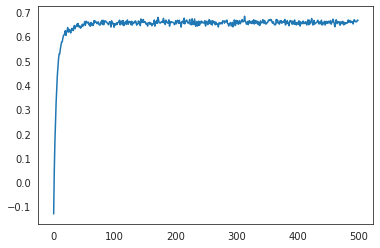

In [37]:
x_data = np.arange(len(plot_loss))
y_data = np.array(plot_loss).reshape(-1,)
plt.plot(x_data, - y_data)
print(-y_data[-1])